<a href="https://colab.research.google.com/github/Monika1266/PRODIGY_ML_01/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error

Loading dataset

In [3]:
df=pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
df.corr()

<ipython-input-6-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


Data Analysis

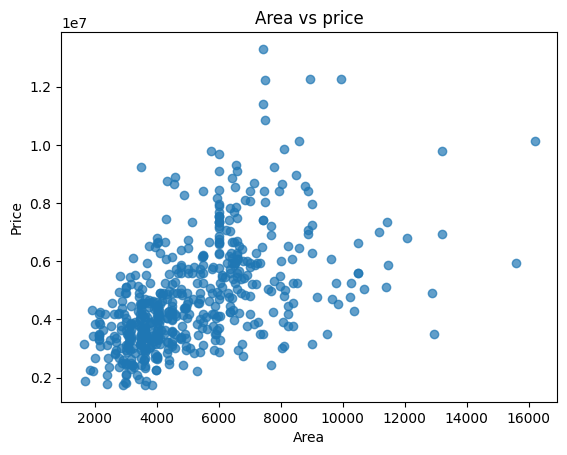

In [7]:
plt.scatter(df['area'],df['price'],alpha=0.7)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs price')
plt.show()

<ipython-input-8-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

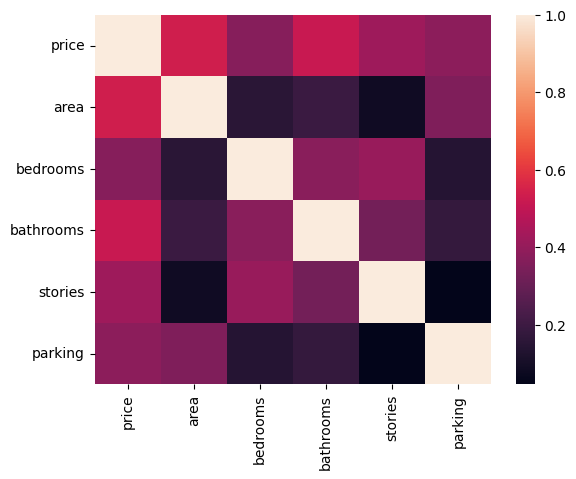

In [8]:
sns.heatmap(df.corr())

In [9]:
x=df.iloc[:,1:5]
y=df['price']
print(x)
print(y)

     area  bedrooms  bathrooms  stories
0    7420         4          2        3
1    8960         4          4        4
2    9960         3          2        2
3    7500         4          2        2
4    7420         4          1        2
..    ...       ...        ...      ...
540  3000         2          1        1
541  2400         3          1        1
542  3620         2          1        1
543  2910         3          1        1
544  3850         3          1        2

[545 rows x 4 columns]
0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


Splitting the data

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(545, 4) (436, 4) (109, 4)
(545,) (436,) (109,)


Scaling the data

In [11]:
scaler=StandardScaler()
x_train_scale=scaler.fit_transform(x_train)
x_test_scale=scaler.fit_transform(x_test)
print(x_train_scale)
print(x_test_scale)

[[ 0.38416819  0.05527092  1.53917323  2.58764353]
 [ 0.9291807   0.05527092  1.53917323 -0.91249891]
 [-0.60775457 -1.28351359 -0.5579503  -0.91249891]
 ...
 [-0.29709744  0.05527092  1.53917323  1.42092939]
 [-0.5060189  -1.28351359 -0.5579503  -0.91249891]
 [ 0.15707965  0.05527092  1.53917323  2.58764353]]
[[ 0.3766674   1.44736842  1.081829    0.11238541]
 [ 0.67252923  0.01315789  1.081829    1.22602264]
 [-0.54050428 -1.42105263 -0.62714725 -1.00125183]
 [-0.06712535  0.01315789 -0.62714725  0.11238541]
 [-0.57995252  0.01315789 -0.62714725 -1.00125183]
 [ 0.7810119   0.01315789 -0.62714725 -1.00125183]
 [ 1.6685974   0.01315789 -0.62714725 -1.00125183]
 [-0.07205638  1.44736842  1.081829    0.11238541]
 [-0.93498672 -1.42105263 -0.62714725 -1.00125183]
 [-1.20126237  0.01315789 -0.62714725 -1.00125183]
 [ 1.69818358  1.44736842  2.79080524  2.33965988]
 [-0.5927732  -1.42105263 -0.62714725 -1.00125183]
 [-0.69829726 -1.42105263 -0.62714725 -1.00125183]
 [-1.00402115  0.01315789

Training the model

In [12]:
model=LinearRegression()
model.fit(x_train_scale,y_train)

LinearRegression()

Making predictions

In [13]:
y_pred=model.predict(x_test_scale)
print(y_pred)

[5880470.80127862 6382535.34258594 3314269.85982376 4327019.10668475
 3471092.44913648 4516917.63052475 5198977.53143013 5535651.62915423
 3011132.12608804 2993650.51850271 8844962.79813182 3274104.11010378
 3193014.76632947 3607066.9890624  3936729.2745     5858466.50057208
 3003116.24248948 4705941.27385441 4649102.94877896 4056957.3074763
 5258292.75741178 4556704.45807756 3166111.29246043 3872312.50608116
 5096668.54629432 7231758.43730114 2954293.80101259 4594460.15380031
 7434180.87747596 3382038.40965914 4973382.32096997 3614645.43240579
 6193074.25900111 4938978.40666375 4428897.98175787 5200735.62127177
 4192880.65950669 3824517.12512226 3289209.80889505 4700886.09487947
 4994359.56115852 3158911.7712842  6352221.56921237 4023881.37294902
 4341148.93285354 4013381.25825179 6654921.86269293 4377743.48918997
 4833747.7501741  2920190.80596732 7213832.05926818 2920190.80596732
 4727649.54336659 4137558.02309992 3998821.32202031 3073224.17360834
 6560191.32090051 3341821.47204364 

Evaluation metrics

In [14]:
r2score=r2_score(y_test,y_pred)
meanabs=mean_absolute_error(y_test,y_pred)
print("Mean absolute error:",meanabs)
print("R sqaured error:",r2score)

Mean absolute error: 1165561.6901941414
R sqaured error: 0.5022361861287024


In [15]:
coeff=model.coef_
inter=model.intercept_
print("Coefficient:",coeff)
print("Intercept:",inter)

Coefficient: [768444.17176366 130480.39967118 599941.27180903 414719.97265162]
Intercept: 4706527.385321101


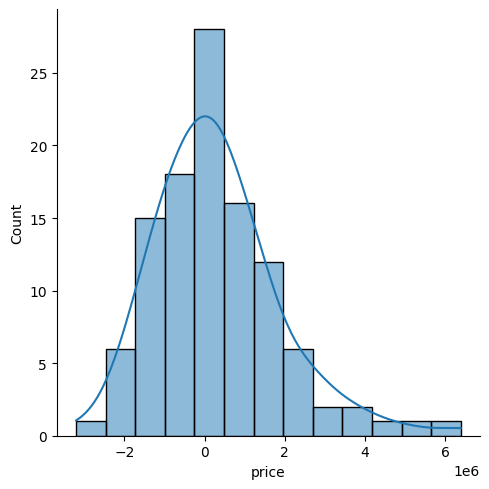

In [16]:
sns.displot((y_test-y_pred),kde=True)

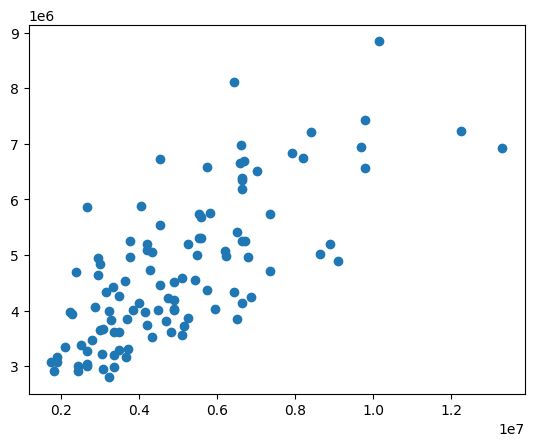

In [17]:
plt.scatter(y_test,y_pred)